## Capstone Project - The Battle of the Neighborhoods

### Applied Data Science Capstone by IBM/Coursera

# Table of contents
- Introduction: Business Problem
- Data
- Methodology
- Analysis
- Results and Discussion
- Conclusion

## Introduction: Business Problem 
This project aims to select the worst effected borough in London based on the total coronavirus confirmed cases, explore the neighborhoods of that borough to find the hospitals and 10 to 15 most common venues each neighborhood and finally cluster the neighborhoods using k-mean clustering.

This report will be targeted to health care workers and current government of London who are facing the effects of Coronavirus pandemic in the world. In order to control the situation they need to first implement strict lockdown in the top most worst effected boroughs and then figure out the neighbourhood of the borough with hospitals and other heallth care facilities. If sufficient hospitals are not there then plan is to convert the other common public venues which are closed as of now to be converted to healthcare and quaratine facilities.

We will focus on the worst effected borough and explore its neighborhoods and the hospitals along with 10 most common venues in each neighborhood so that the best neighborhood suited to an health ministry of London needs can be selected.

### Data
Based on definition of our problem, factors that will influence our decision are:
- The total number of Coronavirus Confirmed Cases in each of the borough.
- The hospitals and most common venues in each of the neighborhood in the worst effected borough selected.

### Following data sources will be needed to extract/generate the required information:
- The data acquired for the project is the combination data from three sources. The first source of the project uses <a href='https://www.mylondon.news/news/health/london-coronavirus-map-exact-number-18148424'>London Coronavirus Infected cases</a> in London.
- The second source of data is scraped from the Wikipedia page that contains the <a href = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'>list of London Boroughs</a>. The page contains  additional information about the borough. 
- The third data source is the list of Neighbourhoods in the Royal Borough of Brent as found on a Wikipedia page. This dataset is created from scratch using the <a href='https://en.wikipedia.org/wiki/List_of_districts_in_the_London_Borough_of_Brent'>list of neighbourhoods</a> available on the site.

## Part 1: Preprocessing a real world data set from MyLondon showing the London Coronavirus Confirmed Cases

### London Coronavirus Confirmed Casesata
About this file

- Borough:  Common Name of London Borough
- Confirmed Cases: No. of Coronavirus infected patients in a Borough

Data set URL: https://www.mylondon.news/news/health/london-coronavirus-map-exact-number-18148424

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests # Library for web scraping

print('Libraries imported.')

Libraries imported.


In [2]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl
import csv
#!pip install  html5lib
print('BeautifulSoup  & csv imported.')

BeautifulSoup  & csv imported.


In [3]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
print('SSL certificate errors ignored.')

SSL certificate errors ignored.


In [4]:
source = requests.get('https://www.mylondon.news/news/health/london-coronavirus-map-exact-number-18148424').text
    
soup = BeautifulSoup(source, 'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html>
 <!--
page generated at: Wed Apr 29 08:27:16 BST 2020
page generated by escenic.server/hostname: reg-pres204.tm-aws.com/reg-pres204.tm-aws.com
page generated in section: 51153
-->
 <head>
  <link href="https://s2-prod.mylondon.news" rel="dns-prefetch"/>
  <link href="https://s2-prod.mylondon.news" rel="preconnect"/>
  <link href="https://i2-prod.mylondon.news" rel="dns-prefetch"/>
  <link href="https://i2-prod.mylondon.news" rel="preconnect"/>
  <link href="https://felix.data.tm-awx.com" rel="dns-prefetch"/>
  <link href="https://felix.data.tm-awx.com" rel="preconnect"/>
  <link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
  <link href="https://www.googletagmanager.com" rel="preconnect"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://c.go-mpulse.net" rel="dns-prefetch"/>
  <link href="https://c.go-mpulse.net" rel="preconnect"/>
  <link h

In [5]:
table = soup.find('table')
table_rows = table.find_all('tr')
print(table_rows)

[<tr> <td><p>Barking and Dagenham</p></td> <td>437</td> </tr>, <tr> <td>Barnet</td> <td>1143</td> </tr>, <tr> <td>Bexley</td> <td>561</td> </tr>, <tr> <td>Brent</td> <td>1289</td> </tr>, <tr> <td>Bromley</td> <td>959</td> </tr>, <tr> <td>Camden</td> <td>543</td> </tr>, <tr> <td>City of London</td> <td>16</td> </tr>, <tr> <td>Croydon</td> <td>1268</td> </tr>, <tr> <td>Ealing</td> <td>988</td> </tr>, <tr> <td>Enfield</td> <td>763</td> </tr>, <tr> <td>Greenwich</td> <td>592</td> </tr>, <tr> <td>Hackney</td> <td>586</td> </tr>, <tr> <td>Hammersmith and Fulham</td> <td>524</td> </tr>, <tr> <td>Haringey</td> <td>514</td> </tr>, <tr> <td>Harrow</td> <td>841</td> </tr>, <tr> <td>Havering</td> <td>601</td> </tr>, <tr> <td>Hillingdon</td> <td>680</td> </tr>, <tr> <td>Hounslow</td> <td>613</td> </tr>, <tr> <td>Islington</td> <td>389</td> </tr>, <tr> <td>Kensington and Chelsea</td> <td>429</td> </tr>, <tr> <td>Kingston upon Thames</td> <td>411</td> </tr>, <tr> <td>Lambeth</td> <td>1071</td> </tr>,

In [6]:
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df_Coronavirus_Cases = pd.DataFrame(data, columns=['Borough', 'Confirmed Cases'])

In [7]:
df_Coronavirus_Cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
Borough            33 non-null object
Confirmed Cases    33 non-null object
dtypes: object(2)
memory usage: 608.0+ bytes


In [8]:
df_Coronavirus_Cases = df_Coronavirus_Cases.astype({'Confirmed Cases': 'int32'})

In [9]:
df_Coronavirus_Cases

,Borough,Confirmed Cases
0,Barking and Dagenham,437
1,Barnet,1143
2,Bexley,561
3,Brent,1289
4,Bromley,959
5,Camden,543
6,City of London,16
7,Croydon,1268
8,Ealing,988
9,Enfield,763


In [10]:
type(df_Coronavirus_Cases)

pandas.core.frame.DataFrame

### Part 2: Scraping additional information of the different Boroughs in London from a Wikipedia page
Using Beautiful soup to scrap the latitude and longitiude of the boroughs in London

URL: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [11]:
# getting data from internet
wiki_link ='https://en.wikipedia.org/wiki/List_of_London_boroughs'
wiki_source_page = requests.get(wiki_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(wiki_source_page,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XqggzgpAAEUAAIBy6xIAAAAJ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":953518321,"wgRevisionId":953518321,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates"

In [12]:
table_wiki = soup.find('table')
table_rows_wiki = table_wiki.find_all('tr')
print(table_rows_wiki)

[<tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>, <tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Hall</a>, 1 Town Square
</td>
<td>13.93
</td>
<td>194,352
</td>
<td><span class

In [13]:
data = []
for row in table_rows_wiki:
    data.append([t.text.strip() for t in row.find_all('td')])

df_London = pd.DataFrame(data, columns=['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map'])

In [14]:
df_London

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,None,None,None,None,None,None,None,None,None,None
1,Barking and Dagenham [note 1],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
2,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
3,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
4,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
5,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20
6,Camden,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11
7,Croydon,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19
8,Ealing,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13
9,Enfield,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30


In [15]:
df_London = df_London.replace('note 1','', regex=True) 
df_London = df_London.replace('note 2','', regex=True) 
df_London = df_London.replace('note 3','', regex=True) 
df_London = df_London.replace('note 4','', regex=True) 
df_London = df_London.replace('note 5','', regex=True) 

df_London

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,None,None,None,None,None,None,None,None,None,None
1,Barking and Dagenham [],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
2,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
3,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
4,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
5,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20
6,Camden,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11
7,Croydon,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19
8,Ealing,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13
9,Enfield,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30


In [16]:
type(df_London)

pandas.core.frame.DataFrame

In [17]:
set(df_Coronavirus_Cases['Borough']) - set(df_London['Borough'])

{'Barking and Dagenham',
 'City of London',
 'Greenwich',
 'Hammersmith and Fulham'}

In [18]:
print("Index of Barking and Dagenham:", df_London.index[df_London['Borough'] == 'Barking and Dagenham []'].tolist())
print("Index of City of London:", df_London.index[df_London['Borough'] == 'City of London []'].tolist())
print("Index of Greenwich:", df_London.index[df_London['Borough'] == 'Greenwich []'].tolist())
print("Index of Hammersmith and Fulham:", df_London.index[df_London['Borough'] == 'Hammersmith and Fulham []'].tolist())


Index of Barking and Dagenham: [1]
Index of City of London: []
Index of Greenwich: [10]
Index of Hammersmith and Fulham: [12]


### Changing the Borough names to match the other data frame df_Coronavirus_Cases

In [19]:
df_London.iloc[1,0] = 'Barking and Dagenham'
df_London.iloc[10,0] = 'Greenwich'
df_London.iloc[12,0] = 'Hammersmith and Fulham'

In [20]:
df_London.drop([0], axis=0, inplace=True)
df_London.reset_index(drop=True, inplace=True)

In [21]:
df_London

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20
5,Camden,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11
6,Croydon,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19
7,Ealing,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13
8,Enfield,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30
9,Greenwich,Y [],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...,22


### We can combine both dataframes together

In [22]:
London_Coronavirus_df = pd.merge(df_Coronavirus_Cases, df_London, on = 'Borough')
London_Coronavirus_df

,Borough,Confirmed Cases,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,437,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,1143,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,561,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,1289,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,959,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20
5,Camden,543,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11
6,Croydon,1268,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19
7,Ealing,988,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13
8,Enfield,763,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30
9,Greenwich,592,Y [],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...,22


In [23]:
London_Coronavirus_df.rename(columns={'Confirmed Cases':'Confirmed Coronavirus Cases'}, inplace=True)

In [24]:
London_Coronavirus_df

,Borough,Confirmed Coronavirus Cases,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,437,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,1143,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,561,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,1289,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,959,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20
5,Camden,543,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11
6,Croydon,1268,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19
7,Ealing,988,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13
8,Enfield,763,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30
9,Greenwich,592,Y [],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...,22


In [25]:
London_Coronavirus_df.shape

(32, 11)

### Rearranging the Columns

In [26]:
# List of Column names of the data frame 
list(London_Coronavirus_df)

['Borough',
 'Confirmed Coronavirus Cases',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [27]:
ColumnTitles = ['Borough', 'Inner', 'Status', 'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)', 
                'Population (2013 est)[1]', 'Co-ordinates', 'Nr. in map', 'Confirmed Coronavirus Cases']

London_Coronavirus_df = London_Coronavirus_df.reindex(columns = ColumnTitles)

London_Coronavirus_df = London_Coronavirus_df[['Borough', 'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)', 
                'Population (2013 est)[1]', 'Co-ordinates', 'Nr. in map', 'Confirmed Coronavirus Cases']]

In [28]:
London_Coronavirus_df

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Confirmed Coronavirus Cases
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25,437
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31,1143
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23,561
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12,1289
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20,959
5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11,543
6,Croydon,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19,1268
7,Ealing,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13,988
8,Enfield,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30,763
9,Greenwich,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...,22,592


# Methodology

<u><b><span style= 'color:blue'> Exploratory Data Analysis: </span></b></u> Visualise the coronavirus spread in the London in order to identify the worst affected borough in London and thereafter extracting the neighbourhoods of that borough to figure out the 10 most common venues in each of those neighbourhoods.

<u><b><span style= 'color:blue'> Modelling: </span></b></u> To help people find similar neighborhoods in the worst affected borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. Initially we will figure out the hospitals in the neighbourhood of that borough for which we will use 2 clusters, since there are very limited hostpitals. Then we will try to find out all the public venues which are closed for now and can be voluntarily converted to health care and quarantine facilites. Here we will use a cluster size of 5 that will cluster the neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that thay can be shortlisted by the health care workers to control the current spread of the virus.

## Exploratory Data Analysis

### Descriptive Statistics of the Data

In [29]:
df_Coronavirus_Cases.describe()

,Confirmed Cases
count,33.000000
mean,699.151515
std,284.097928
min,16.000000
25%,543.000000
50%,621.000000
75%,880.000000
max,1289.000000


### Sort the total coronavirus cases in descending order to see 5 boroughs with the highest number of confirmed cases

In [30]:
London_Coronavirus_df.sort_values(by= 'Confirmed Coronavirus Cases', ascending= False, inplace=True)
df_top5_hotspots = London_Coronavirus_df.head()
df_top5_hotspots

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Confirmed Coronavirus Cases
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12,1289
6,Croydon,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19,1268
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31,1143
26,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,"298,464",51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W﻿ /...,7,1137
20,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,"314,242",51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W﻿ /...,6,1071


In [31]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  2.0.2


### Visualize the top five hotspots with highest Confirmed Coronavirus Cases

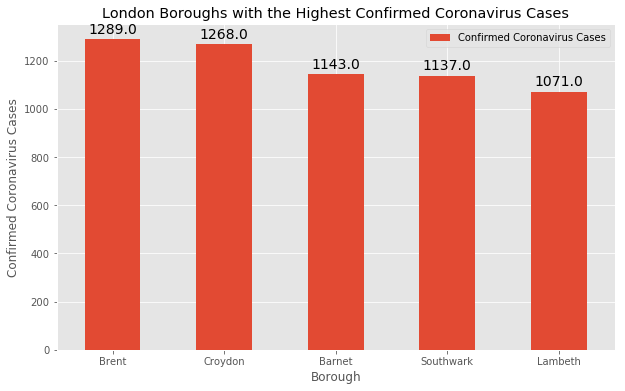

In [32]:
df_tt = df_top5_hotspots[['Borough','Confirmed Coronavirus Cases']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Confirmed Coronavirus Cases') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest Confirmed Coronavirus Cases') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()


### Comparing the five boroughs with the highest no. of coronavirus confirmed cases is is quite evident that Brent is the worst effected followed by Croydon, Barnet, Southwark and Lambeth.

### We will priortise these Hotspots of Coronavirus Cases 

### Sort the total coronavirus cases in ascending order to see 5 boroughs with the lease number of confirmed cases

In [33]:
London_Coronavirus_df.sort_values(by= 'Confirmed Coronavirus Cases', axis= 0, inplace=True)
df_bot5_hotspots = London_Coronavirus_df.head()
df_bot5_hotspots

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Confirmed Coronavirus Cases
25,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,"191,365",51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W﻿ /...,15,349
17,Islington,Islington London Borough Council,Labour,"Customer Centre, 222 Upper Street",5.74,"215,667",51°32′30″N 0°06′08″W﻿ / ﻿51.5416°N 0.1022°W﻿ /...,10,389
19,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,"166,793",51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W﻿ /...,16,411
18,Kensington and Chelsea,Kensington and Chelsea London Borough Council,Conservative,"The Town Hall, Hornton Street",4.68,"155,594",51°30′07″N 0°11′41″W﻿ / ﻿51.5020°N 0.1947°W﻿ /...,3,429
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25,437


### Visualize the bottom five controlled areas with lowest number infections

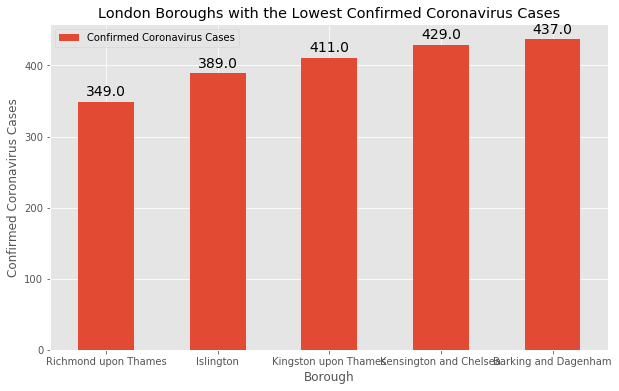

In [34]:
df_tt = df_bot5_hotspots[['Borough','Confirmed Coronavirus Cases']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Confirmed Coronavirus Cases') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Lowest Confirmed Coronavirus Cases') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### Comparing the five boroughs with the lowest no. of coronavirus confirmed cases in London it is quite evident that Richmond upon Thames is the least effected followed by Islington, Kinston Upon Thames, Kensington and Chelsea and Barking and Dagenham.

### After looking at the above data it is clear that Brent has the maximum no. of Coronavirus cases recorded so far.

In [35]:
df_worst_affected_borough = df_top5_hotspots[df_top5_hotspots['Borough'] == 'Brent']
df_worst_affected_borough = df_worst_affected_borough[['Borough', 'Confirmed Coronavirus Cases', 'Area (sq mi)', 'Population (2013 est)[1]']]
df_worst_affected_borough

,Borough,Confirmed Coronavirus Cases,Area (sq mi),Population (2013 est)[1]
3,Brent,1289,16.70,"317,264"


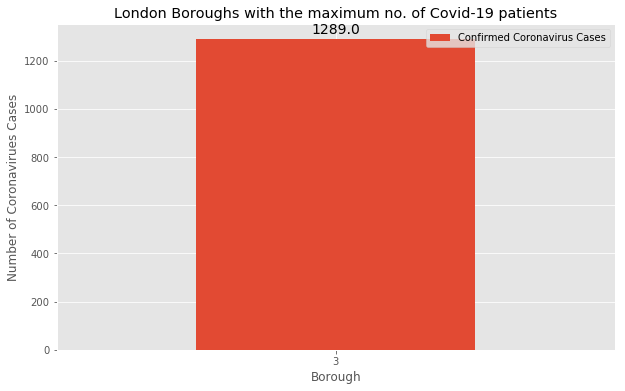

In [79]:
ax = df_worst_affected_borough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Coronavirues Cases') # add to y-label to the plot
ax.set_xlabel('Borough') # add x-label to the plot
ax.set_title('London Boroughs with the maximum no. of Covid-19 patients') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

# Part 3: Creating a new dataset of the Neighborhoods of the worst affected borough in London and generating their co-ordinates. 
The list of Neighborhoods in the Royal Borough of Brent was found on a wikipedia page: 
https://en.wikipedia.org/wiki/List_of_districts_in_the_London_Borough_of_Brent

### Find the Co-ordiantes of each Neighborhood in the Brent Borough

In [37]:
#!conda install -c conda-forge geopy --yes 

#!pip install geocoder
import geocoder

#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [38]:
Neighborhood = ['Alperton', 'Brondesbury', 'Brondesbury Park', 'Church End', 'Cricklewood', 
                'Dollis Hill', 'Harlesden', 'Kensal Green', 'Kilburn', 'Kingsbury', 'Neasden', 'Park Royal',
                'Queens Park', 'Stonebridge', 
                'Willesden', 'Willesden Green' ]

Borough = ['Brent','Brent','Brent',
            'Brent','Brent','Brent','Brent',
            'Brent','Brent','Brent','Brent',
            'Brent','Brent','Brent', 'Brent',
            'Brent']

Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    print(address)
    geolocator = Nominatim(timeout=500)
    location = geolocator.geocode(address)
    print(location)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

Alperton,London,United Kingdom


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


Alperton, Ealing Road, Alperton, London Borough of Brent, London, Greater London, England, HA0 4LL, United Kingdom
Brondesbury,London,United Kingdom
Brondesbury, Gladstone Mews, Cricklewood, London Borough of Brent, London, Greater London, England, NW6 7XX, United Kingdom
Brondesbury Park,London,United Kingdom
Brondesbury Park, Cricklewood, London Borough of Brent, London, Greater London, England, NW6 6RP, United Kingdom
Church End,London,United Kingdom
Church End, London Borough of Barnet, London, Greater London, England, N3 2BH, United Kingdom
Cricklewood,London,United Kingdom
Cricklewood, London, Greater London, England, NW2 3HT, United Kingdom
Dollis Hill,London,United Kingdom
Dollis Hill, Chapter Road, Willesden, London Borough of Brent, London, Greater London, England, NW2 5LY, United Kingdom
Harlesden,London,United Kingdom
Harlesden, Acton Lane, Willesden, London Borough of Brent, London, Greater London, England, NW10 7AA, United Kingdom
Kensal Green,London,United Kingdom
Kensal

In [39]:
df_neighourhood = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
Brent_neigh = pd.DataFrame(data=df_neighourhood, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

Brent_neigh

,Neighborhood,Borough,Latitude,Longitude
0,Alperton,Brent,51.540804,-0.300096
1,Brondesbury,Brent,51.545049,-0.202596
2,Brondesbury Park,Brent,51.540514,-0.210336
3,Church End,Brent,51.601117,-0.191890
4,Cricklewood,Brent,51.556699,-0.215751
5,Dollis Hill,Brent,51.551963,-0.239021
6,Harlesden,Brent,51.536357,-0.257833
7,Kensal Green,Brent,51.530606,-0.224445
8,Kilburn,Brent,51.541882,-0.197936
9,Kingsbury,Brent,51.584317,-0.278714


### Get the co-ordinates of Central Location in London, United Kingdom (The center neighborhood of Brent)

In [40]:
address = 'Harlesden, London, United Kingdom'

geolocator = Nominatim(timeout=3)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Point in London are {}, {}.'.format(latitude, longitude))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Central Point in London are 51.5363567, -0.257833.


### Visualize the Neighborhood of Brent Borough

In [41]:
#!pip install folium
import folium

In [42]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(Brent_neigh.Latitude, Brent_neigh.Longitude, Brent_neigh['Borough'], Brent_neigh['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

## Modelling

- Finding all the venues within a 500 meter radius of each neighborhood.
- Perform one hot ecoding on the venues data.
- Grouping the venues by the neighborhood and calculating their mean.
- Performing a K-means clustering (Defining K = 5)

### Define Foursquare Credentials and Version
Make sure that you have created a Foursquare developer account and have your credentials handy

In [43]:
CLIENT_ID = 'WJHXDJSNP1FKGZ1UHGI0LFNQQBLOV1SNEZSR4ONSJJNOGN02' # your Foursquare ID
CLIENT_SECRET = 'WMFBMQBMKDTDINE4AKMEIXAWGBOYVFQNTKVI1A1AAC0Q5RT1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
categoryId = '4bf58dd8d48988d196941735'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WJHXDJSNP1FKGZ1UHGI0LFNQQBLOV1SNEZSR4ONSJJNOGN02
CLIENT_SECRET:WMFBMQBMKDTDINE4AKMEIXAWGBOYVFQNTKVI1A1AAC0Q5RT1


### Create a function to extract the hospitals and  venues  from each Neighborhood

In [44]:
def getNearbyHospitals(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
        
        
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Fetching the hospitals in the neighbourhoods of Brent

In [45]:
Brent_venues = getNearbyHospitals(names=Brent_neigh['Neighborhood'],
                                   latitudes=Brent_neigh['Latitude'],
                                   longitudes=Brent_neigh['Longitude']
                                  )

Alperton
Brondesbury
Brondesbury Park
Church End
Cricklewood
Dollis Hill
Harlesden
Kensal Green
Kilburn
Kingsbury
Neasden
Park Royal
Queens Park
Stonebridge
Willesden
Willesden Green


In [46]:
print(Brent_venues.shape)
Brent_venues.head()

(3, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Brondesbury,51.545049,-0.202596,Brondesbury medical center,51.543601,-0.200030,Hospital
1,Kilburn,51.541882,-0.197936,Brondesbury medical center,51.543601,-0.200030,Hospital
2,Willesden,51.546622,-0.235866,Willesden Centre for Health Care,51.542861,-0.235756,Hospital


#### So we have 3 neighbourhoods with the hospitals as categories. Those neighbourhoods are Brondesbury, Kilburn & Willesden

In [47]:
Brent_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Brondesbury,1,1,1,1,1,1
Kilburn,1,1,1,1,1,1
Willesden,1,1,1,1,1,1


In [48]:
print('There are {} uniques categories.'.format(len(Brent_venues['Venue Category'].unique())))

There are 1 uniques categories.


In [49]:
def addToMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Neighborhood'], df['Venue'], df['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(existingMap)

In [50]:
map_Brent = folium.Map(location=[latitude, longitude], zoom_start=10)
addToMap(Brent_venues, 'red', map_Brent)

map_Brent

### Analyze Each Neighborhood

In [51]:
# one hot encoding
Brent_onehot = pd.get_dummies(Brent_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Brent_onehot['Neighborhood'] = Brent_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Brent_onehot.columns[-1]] + list(Brent_onehot.columns[:-1])
Brent_onehot = Brent_onehot[fixed_columns]

Brent_onehot.head()

,Neighborhood,Hospital
0,Brondesbury,1
1,Kilburn,1
2,Willesden,1


In [52]:
Brent_grouped = Brent_onehot.groupby('Neighborhood').mean().reset_index()
Brent_grouped

,Neighborhood,Hospital
0,Brondesbury,1
1,Kilburn,1
2,Willesden,1


In [53]:
Brent_grouped.columns

Index(['Neighborhood', 'Hospital'], dtype='object')

In [54]:
def return_most_common_hospitals(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Brent_grouped['Neighborhood']

for ind in np.arange(Brent_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_hospitals(Brent_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brondesbury,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital
1,Kilburn,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital
2,Willesden,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital


### Cluster Neighbourhood

In [56]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 2

Brent_grouped_clustering = Brent_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Brent_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0])

In [57]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Brent_merged = Brent_neigh
Brent_merged = Brent_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Brent_merged

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alperton,Brent,51.540804,-0.300096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brondesbury,Brent,51.545049,-0.202596,0.0,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital
2,Brondesbury Park,Brent,51.540514,-0.210336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Church End,Brent,51.601117,-0.191890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cricklewood,Brent,51.556699,-0.215751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dollis Hill,Brent,51.551963,-0.239021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Harlesden,Brent,51.536357,-0.257833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kensal Green,Brent,51.530606,-0.224445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Kilburn,Brent,51.541882,-0.197936,0.0,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital
9,Kingsbury,Brent,51.584317,-0.278714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Brent_merged['Latitude'], Brent_merged['Longitude'], Brent_merged['Neighborhood'], Brent_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 1st Cluster of neighbourhoods with hospitals.

In [59]:
Brent_merged[Brent_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Brondesbury,Brent,51.545049,-0.202596,0.0,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital
8,Kilburn,Brent,51.541882,-0.197936,0.0,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital
14,Willesden,Brent,51.546622,-0.235866,0.0,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital,Hospital


In [60]:
Brent_merged[Brent_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


### In the above cluster we got the neighbourhoods with the hospitals and comparing to the whole region the number of hospitals are quite less and not sufficient to handle growing number of Covid-19 patients. So we can plan to acquire more public places like hotels, townhalls, studios which can voluntarily contribute towards converting these places into healthcare  and quarantine facilities. Hence, therefore now we need fetch venues by no category which provides the neighbourhoods with all public places.

In [61]:
Brent_venues = getNearbyVenues(names=Brent_neigh['Neighborhood'],
                                   latitudes=Brent_neigh['Latitude'],
                                   longitudes=Brent_neigh['Longitude']
                                  )

Alperton
Brondesbury
Brondesbury Park
Church End
Cricklewood
Dollis Hill
Harlesden
Kensal Green
Kilburn
Kingsbury
Neasden
Park Royal
Queens Park
Stonebridge
Willesden
Willesden Green


In [62]:
print(Brent_venues.shape)
Brent_venues.head()

(260, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alperton,51.540804,-0.300096,The Gym,51.540819,-0.298715,Gym / Fitness Center
1,Alperton,51.540804,-0.300096,Sainsbury's,51.538431,-0.302540,Supermarket
2,Alperton,51.540804,-0.300096,Maru Bhajias,51.543873,-0.297200,Indian Restaurant
3,Alperton,51.540804,-0.300096,Subway,51.541707,-0.297996,Sandwich Place
4,Alperton,51.540804,-0.300096,East Pan Asian Restaurant,51.537700,-0.301996,Asian Restaurant


In [63]:
Brent_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alperton,9,9,9,9,9,9
Brondesbury,37,37,37,37,37,37
Brondesbury Park,9,9,9,9,9,9
Church End,34,34,34,34,34,34
Cricklewood,31,31,31,31,31,31
Dollis Hill,5,5,5,5,5,5
Harlesden,5,5,5,5,5,5
Kensal Green,11,11,11,11,11,11
Kilburn,33,33,33,33,33,33


In [64]:
print('There are {} uniques categories.'.format(len(Brent_venues['Venue Category'].unique())))

There are 75 uniques categories.


In [65]:
def addToMap(df_hos, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df_hos['Venue Latitude'], df_hos['Venue Longitude'], df_hos['Neighborhood'], df_hos['Venue'], df_hos['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(existingMap)

In [66]:
map_Brent = folium.Map(location=[latitude, longitude], zoom_start=10)
addToMap(Brent_venues, 'red', map_Brent)

map_Brent

### Analyzing Each Neighbourhood

In [67]:
# one hot encoding
Brent_onehot = pd.get_dummies(Brent_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Brent_onehot['Neighborhood'] = Brent_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Brent_onehot.columns[-1]] + list(Brent_onehot.columns[:-1])
Brent_onehot = Brent_onehot[fixed_columns]

Brent_onehot.head()

,Neighborhood,Afghan Restaurant,Asian Restaurant,Auto Garage,Bagel Shop,Bakery,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bridal Shop,...,Theater,Town Hall,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio
0,Alperton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alperton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alperton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alperton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alperton,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
Brent_grouped = Brent_onehot.groupby('Neighborhood').mean().reset_index()
Brent_grouped

,Neighborhood,Afghan Restaurant,Asian Restaurant,Auto Garage,Bagel Shop,Bakery,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bridal Shop,...,Theater,Town Hall,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio
0,Alperton,0.000000,0.111111,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Brondesbury,0.000000,0.027027,0.0,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,...,0.027027,0.000,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.027027,0.00
2,Brondesbury Park,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Church End,0.000000,0.000000,0.0,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.029412,0.000000,0.088235,0.000000,0.029412,0.000000,0.000000,0.00
4,Cricklewood,0.032258,0.032258,0.0,0.032258,0.000000,0.000000,0.000000,0.032258,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,Dollis Hill,0.000000,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Harlesden,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Kensal Green,0.000000,0.000000,0.0,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.00
8,Kilburn,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.060606,0.000000,0.000000,...,0.030303,0.000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.030303,0.00
9,Kingsbury,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Brent_grouped['Neighborhood']

for ind in np.arange(Brent_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Brent_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alperton,Supermarket,Indian Restaurant,Café,Asian Restaurant,Fast Food Restaurant,Sandwich Place,Gym / Fitness Center,Bridal Shop,Farmers Market,Fish & Chips Shop
1,Brondesbury,Coffee Shop,Pub,Café,Bus Stop,Grocery Store,Middle Eastern Restaurant,Pizza Place,Park,Deli / Bodega,Convenience Store
2,Brondesbury Park,Park,Pub,Japanese Restaurant,Gym / Fitness Center,Train Station,Coffee Shop,Grocery Store,Farmers Market,Discount Store,Doner Restaurant
3,Church End,Supermarket,Indian Restaurant,Café,Turkish Restaurant,Coffee Shop,Pub,Japanese Restaurant,Pizza Place,Bakery,Seafood Restaurant
4,Cricklewood,Coffee Shop,Bus Stop,Hotel,Grocery Store,Fast Food Restaurant,Gym / Fitness Center,Pub,Café,Sandwich Place,Discount Store


### CLUSTER NEIGHBOURHOOD

### For Clustering I am using k-means neighbour clustering Machine Learning algorithm. This is unsupervised algorithm and its use is to cluster the places based on the Euclidean distance.

In [71]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

Brent_grouped_clustering = Brent_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Brent_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 3, 4, 1, 1, 1])

In [72]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Brent_merged = Brent_neigh
Brent_merged = Brent_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Brent_merged

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alperton,Brent,51.540804,-0.300096,1,Supermarket,Indian Restaurant,Café,Asian Restaurant,Fast Food Restaurant,Sandwich Place,Gym / Fitness Center,Bridal Shop,Farmers Market,Fish & Chips Shop
1,Brondesbury,Brent,51.545049,-0.202596,1,Coffee Shop,Pub,Café,Bus Stop,Grocery Store,Middle Eastern Restaurant,Pizza Place,Park,Deli / Bodega,Convenience Store
2,Brondesbury Park,Brent,51.540514,-0.210336,1,Park,Pub,Japanese Restaurant,Gym / Fitness Center,Train Station,Coffee Shop,Grocery Store,Farmers Market,Discount Store,Doner Restaurant
3,Church End,Brent,51.601117,-0.191890,1,Supermarket,Indian Restaurant,Café,Turkish Restaurant,Coffee Shop,Pub,Japanese Restaurant,Pizza Place,Bakery,Seafood Restaurant
4,Cricklewood,Brent,51.556699,-0.215751,1,Coffee Shop,Bus Stop,Hotel,Grocery Store,Fast Food Restaurant,Gym / Fitness Center,Pub,Café,Sandwich Place,Discount Store
5,Dollis Hill,Brent,51.551963,-0.239021,3,Restaurant,Bakery,Music Venue,Thai Restaurant,Hostel,Halal Restaurant,Hookah Bar,Gym / Fitness Center,Gym,Grocery Store
6,Harlesden,Brent,51.536357,-0.257833,4,Middle Eastern Restaurant,Train Station,Movie Theater,Pub,Auto Garage,Halal Restaurant,Fruit & Vegetable Store,Discount Store,Doner Restaurant,Farmers Market
7,Kensal Green,Brent,51.530606,-0.224445,1,Pub,Wine Shop,Portuguese Restaurant,Indian Restaurant,Train Station,Bakery,Restaurant,Brazilian Restaurant,Grocery Store,Park
8,Kilburn,Brent,51.541882,-0.197936,1,Café,Indian Restaurant,Pub,Supermarket,Brazilian Restaurant,Italian Restaurant,Discount Store,Pizza Place,Coffee Shop,Pharmacy
9,Kingsbury,Brent,51.584317,-0.278714,1,Grocery Store,Pub,Fruit & Vegetable Store,Coffee Shop,Sandwich Place,Snack Place,Supermarket,Portuguese Restaurant,Gym / Fitness Center,Indian Restaurant


In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Brent_merged['Latitude'], Brent_merged['Longitude'], Brent_merged['Neighborhood'], Brent_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Each cluster is color coded for the ease of presentation. We can see that majority of neighbourhood falls in purple which is second cluster. First, Third and fifth cluster are in Red, Yellow and blue. Whereas fourth cluster is lemon green in color

In [74]:
Brent_merged[Brent_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Stonebridge,Brent,51.54411,-0.276228,0,Diner,Platform,Café,Syrian Restaurant,Yoga Studio,Doner Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop


In [75]:
Brent_merged[Brent_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alperton,Brent,51.540804,-0.300096,1,Supermarket,Indian Restaurant,Café,Asian Restaurant,Fast Food Restaurant,Sandwich Place,Gym / Fitness Center,Bridal Shop,Farmers Market,Fish & Chips Shop
1,Brondesbury,Brent,51.545049,-0.202596,1,Coffee Shop,Pub,Café,Bus Stop,Grocery Store,Middle Eastern Restaurant,Pizza Place,Park,Deli / Bodega,Convenience Store
2,Brondesbury Park,Brent,51.540514,-0.210336,1,Park,Pub,Japanese Restaurant,Gym / Fitness Center,Train Station,Coffee Shop,Grocery Store,Farmers Market,Discount Store,Doner Restaurant
3,Church End,Brent,51.601117,-0.191890,1,Supermarket,Indian Restaurant,Café,Turkish Restaurant,Coffee Shop,Pub,Japanese Restaurant,Pizza Place,Bakery,Seafood Restaurant
4,Cricklewood,Brent,51.556699,-0.215751,1,Coffee Shop,Bus Stop,Hotel,Grocery Store,Fast Food Restaurant,Gym / Fitness Center,Pub,Café,Sandwich Place,Discount Store
7,Kensal Green,Brent,51.530606,-0.224445,1,Pub,Wine Shop,Portuguese Restaurant,Indian Restaurant,Train Station,Bakery,Restaurant,Brazilian Restaurant,Grocery Store,Park
8,Kilburn,Brent,51.541882,-0.197936,1,Café,Indian Restaurant,Pub,Supermarket,Brazilian Restaurant,Italian Restaurant,Discount Store,Pizza Place,Coffee Shop,Pharmacy
9,Kingsbury,Brent,51.584317,-0.278714,1,Grocery Store,Pub,Fruit & Vegetable Store,Coffee Shop,Sandwich Place,Snack Place,Supermarket,Portuguese Restaurant,Gym / Fitness Center,Indian Restaurant
10,Neasden,Brent,51.554336,-0.250749,1,Portuguese Restaurant,Sandwich Place,Train Station,Supermarket,Bus Stop,Fish & Chips Shop,Diner,Discount Store,Doner Restaurant,Farmers Market
11,Park Royal,Brent,51.526434,-0.283935,1,Hotel,Movie Theater,Gym / Fitness Center,Fast Food Restaurant,Pizza Place,Portuguese Restaurant,Hookah Bar,Sandwich Place,Flower Shop,Coffee Shop


### Second Cluster with other venues, we will choose this cluster due to maximum number of venues available and  also neighbourhoods with hospitals will be situated nearer i.e in Brondesbury and Kilburn which will help the doctors to traverse from hospitals to the health care facilities.

In [76]:
Brent_merged[Brent_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Queens Park,Brent,51.529149,-0.208813,2,Yoga Studio,Gym,Town Hall,Café,Garden,Italian Restaurant,Train Station,Flower Shop,Diner,Discount Store


In [77]:
Brent_merged[Brent_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Dollis Hill,Brent,51.551963,-0.239021,3,Restaurant,Bakery,Music Venue,Thai Restaurant,Hostel,Halal Restaurant,Hookah Bar,Gym / Fitness Center,Gym,Grocery Store
14,Willesden,Brent,51.546622,-0.235866,3,Grocery Store,Hostel,Vegetarian / Vegan Restaurant,Bakery,Breakfast Spot,Music Venue,Bus Station,Garden,Farmers Market,Fast Food Restaurant


In [78]:
Brent_merged[Brent_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Harlesden,Brent,51.536357,-0.257833,4,Middle Eastern Restaurant,Train Station,Movie Theater,Pub,Auto Garage,Halal Restaurant,Fruit & Vegetable Store,Discount Store,Doner Restaurant,Farmers Market


### We can consider this fourth cluster also since it has the neighbourhood i.e Willesden with hospital nearby.